In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os


The type of this input is <class 'numpy.ndarray'>
Shape: (4000, 6000, 3)


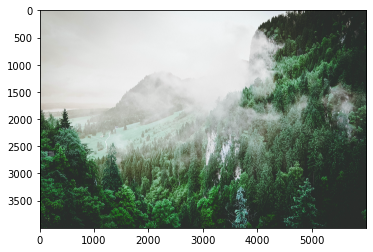

In [3]:
image = cv2.imread('nature.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

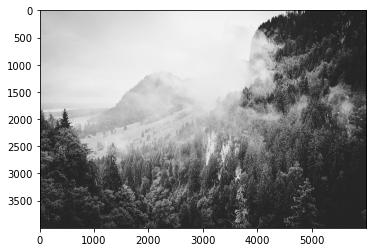

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

In [11]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [12]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [13]:
modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

In [15]:
clf = KMeans(n_clusters = 10)
labels = clf.fit_predict(modified_image)

([<matplotlib.patches.Wedge at 0x7ff02ee97550>,
 [Text(1.0593315516699735, 0.2963387649911612, '#708c6b'),
  Text(0.7131219411309051, 0.8375303559141545, '#d7dad7'),
  Text(-0.19334754018906466, 1.0828742903508413, '#557752'),
  Text(-0.8663920326089113, 0.677764594702172, '#40623e'),
  Text(-1.0257313705915756, 0.39733506689484105, '#acb5a9'),
  Text(-1.09737474823048, 0.07595170798665804, '#c5cbc4'),
  Text(-1.0388187544743626, -0.36173967898522574, '#8ea088'),
  Text(-0.21475475667542543, -1.0788328853373348, '#304a2f'),
  Text(0.8944331386781875, -0.6403041155843732, '#ececea'),
  Text(1.0888753682810106, -0.1560462506787447, '#2a3128')])

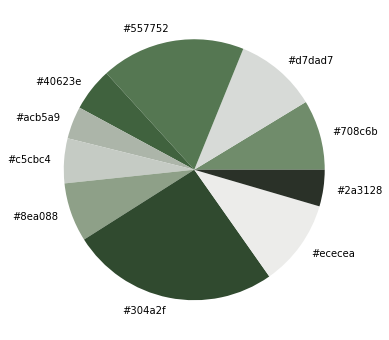

In [18]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
